## Business Scenario: 
A Fast Moving Consumer Goods (FMCG) company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is low and vice-versa which as a result as a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each warehouse in entire country.

## Goal & Objective: 
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to ship each time from the respective warehouse.


In [1]:
# Importing Python Libraries
import numpy as np 
import pandas as pd 

# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt 

# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset using Pandas Library

df = pd.read_csv('https://raw.githubusercontent.com/chandanc5525/SupplyChain_BusinessModel/main/Dataset/SCM.csv')

df.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [3]:
df.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.020336,0.008104,-0.001776,0.005063,-0.014583,-0.004816,-0.007217,-0.000611,-0.013751,0.012628,-0.007719,0.263539,0.000704,-0.006470,0.000676
transport_issue_l1y,0.020336,1.000000,-0.008288,0.001391,0.005509,-0.006671,0.003131,-0.007378,0.013864,-0.009625,-0.013837,-0.145914,0.012757,0.011795,0.006058,-0.175746
Competitor_in_mkt,0.008104,-0.008288,1.000000,-0.154848,0.000886,0.008982,-0.004428,-0.000688,0.010358,-0.004387,-0.012101,0.007654,0.011397,0.012544,-0.043094,0.007282
retail_shop_num,-0.001776,0.001391,-0.154848,1.000000,-0.004396,-0.005321,0.004502,-0.006812,0.001983,-0.007281,0.007627,-0.007045,-0.000464,-0.005694,0.043557,-0.006785
distributor_num,0.005063,0.005509,0.000886,-0.004396,1.000000,0.008004,-0.006096,-0.000763,-0.007538,-0.014371,-0.015375,0.003314,0.004048,0.001885,-0.005996,0.005143
flood_impacted,-0.014583,-0.006671,0.008982,-0.005321,0.008004,1.000000,0.106622,0.167565,0.005620,0.166148,0.002122,-0.006221,-0.011838,-0.000023,-0.001179,-0.005055
flood_proof,-0.004816,0.003131,-0.004428,0.004502,-0.006096,0.106622,1.000000,0.115616,-0.003186,0.041031,-0.001866,-0.005069,0.004251,-0.007964,-0.007171,-0.003567
electric_supply,-0.007217,-0.007378,-0.000688,-0.006812,-0.000763,0.167565,0.115616,1.000000,-0.002138,0.341788,-0.006766,-0.000821,-0.006324,-0.012428,-0.007258,-0.000725
dist_from_hub,-0.000611,0.013864,0.010358,0.001983,-0.007538,0.005620,-0.003186,-0.002138,1.000000,-0.015183,0.009228,-0.006531,0.000175,0.001300,0.002769,-0.006040
workers_num,-0.013751,-0.009625,-0.004387,-0.007281,-0.014371,0.166148,0.041031,0.341788,-0.015183,1.000000,0.006868,-0.008788,0.000717,-0.020225,-0.004913,-0.007800


<AxesSubplot:>

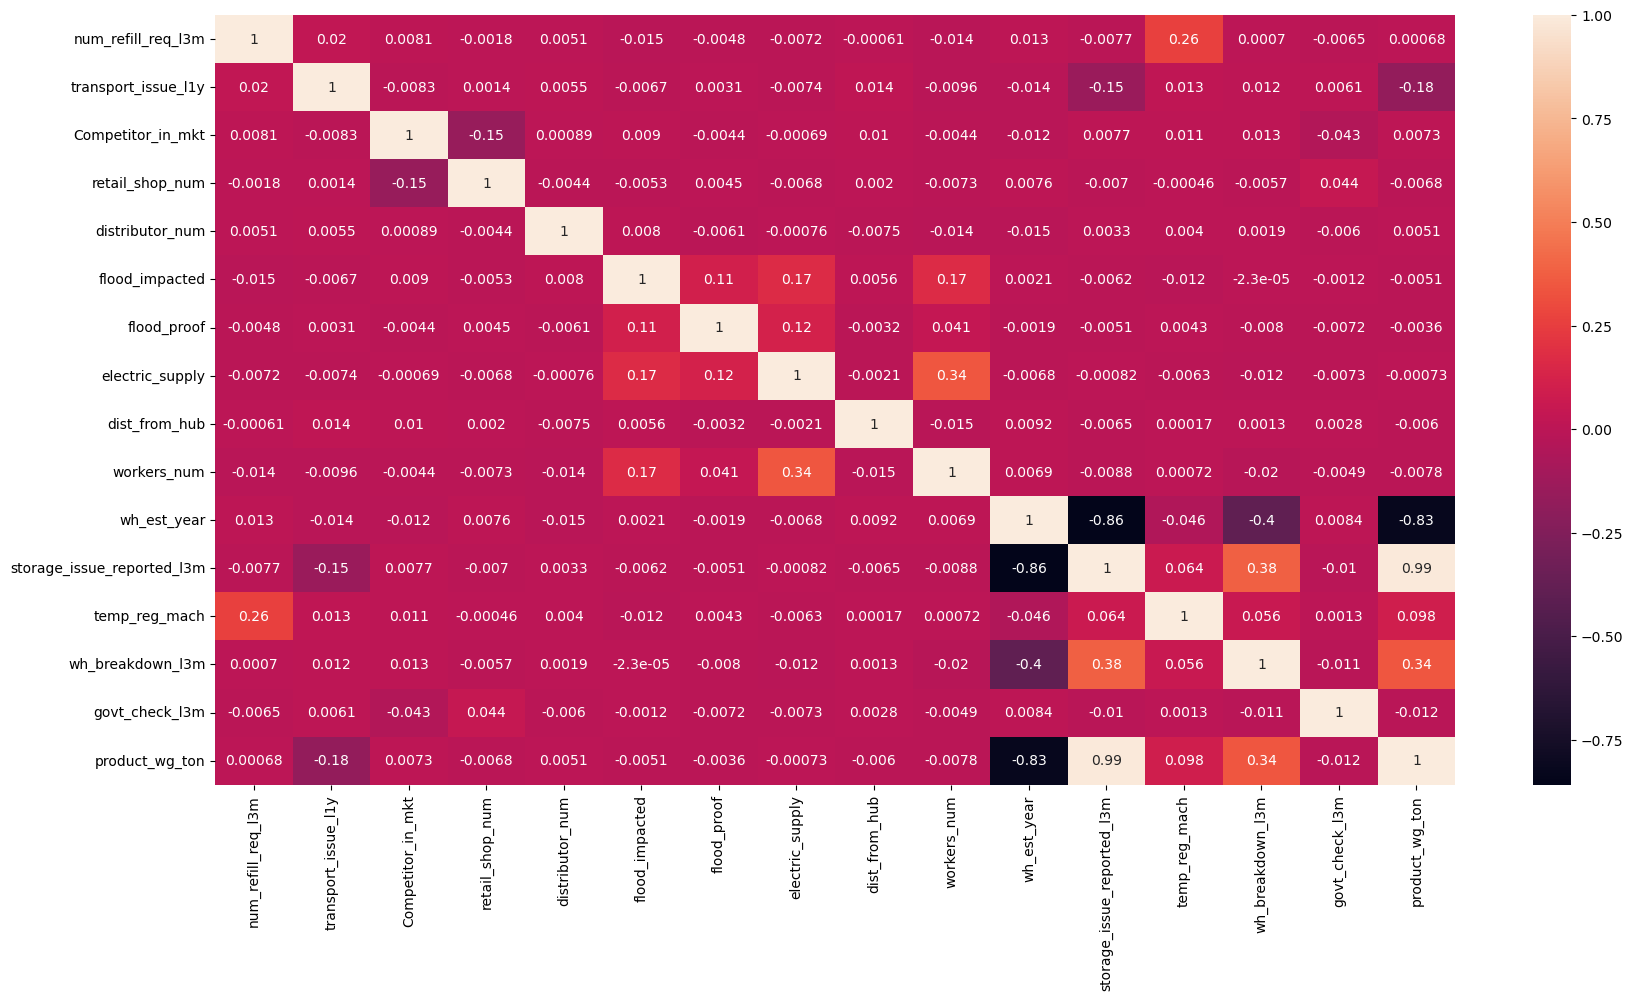

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [5]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [6]:
df.describe()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


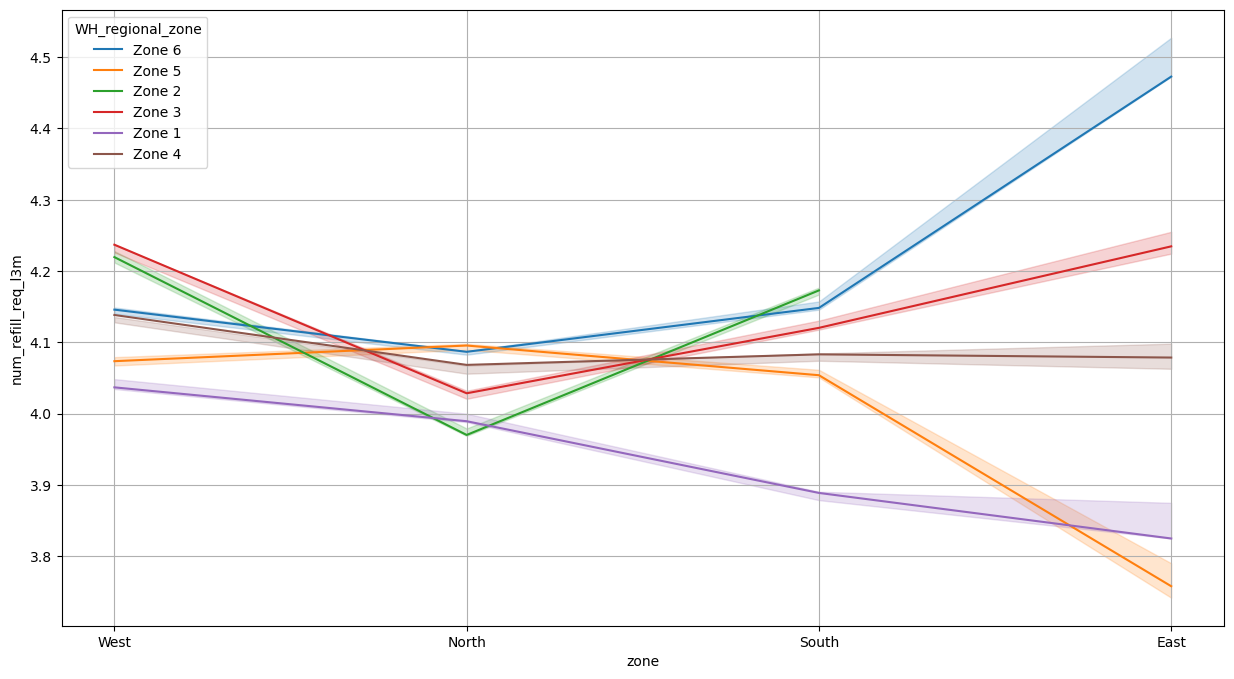

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x= df['zone'],y=df['num_refill_req_l3m'],hue = df['WH_regional_zone'],ci=5,style_order=True)
plt.grid()

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='num_refill_req_l3m'>

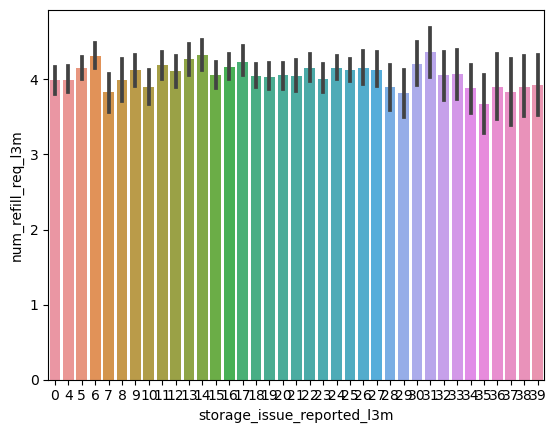

In [11]:
sns.barplot(data=df, x= df['storage_issue_reported_l3m'],y=df['num_refill_req_l3m'])

<AxesSubplot:xlabel='zone', ylabel='storage_issue_reported_l3m'>

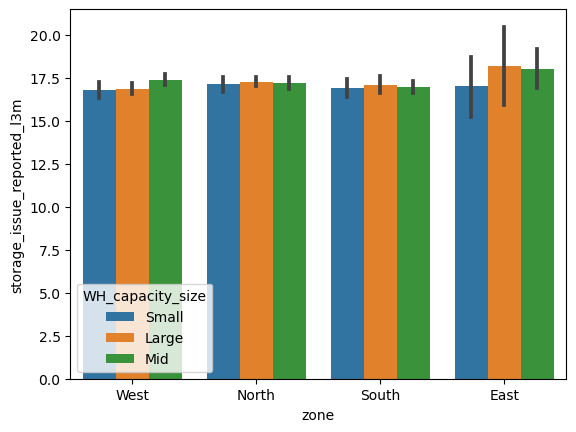

In [26]:
sns.barplot(data=df, x= df['zone'],y=df['storage_issue_reported_l3m'],hue = df['WH_capacity_size'])

In [27]:
!pip install plotly

In [28]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'


In [31]:
fig = px.bar(data_frame=df, x= df['zone'], y=df['storage_issue_reported_l3m'],color='Location_type')
fig.show()


In [33]:
!pip install codeViz

ERROR: Could not find a version that satisfies the requirement codeViz (from versions: none)
ERROR: No matching distribution found for codeViz
